## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [5]:
df.count()[0]

294478

c. The number of unique users in the dataset.

In [6]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [7]:
df[df['converted']==1].count()[0]/df.count()[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [64]:
df.query("(group == 'treatment' and landing_page == 'old_page')").shape[0]

1965

f. Do any of the rows have missing values?

In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2=df[((df['group']=='treatment')&(df['landing_page']== 'new_page'))|((df['group']=='control')&(df['landing_page']== 'old_page') )]

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2.duplicated('user_id')

0         False
1         False
2         False
3         False
4         False
          ...  
294473    False
294474    False
294475    False
294476    False
294477    False
Length: 290585, dtype: bool

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop_duplicates('user_id',inplace=True)

C:\Users\Mohamed Wael\AppData\Local\Temp\ipykernel_19180\2063672768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates('user_id',inplace=True)


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2[df2["converted"]==1].count()[0] / df2.count()[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [77]:
c = df2[df2['group']=='control'].converted.mean()

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [78]:
t = df2[df2['group']=='treatment'].converted.mean()

d. What is the probability that an individual received the new page?

In [19]:
df2[(df2['landing_page']=='new_page')].count()[0] / df2.count()[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**we notice that  the control group here does slightly better than the treatment.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**assuming that the the old one is better or equal as null hypothesis and The alternative is being the new one is better.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
df["converted"].mean()

0.11965919355605512

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
df["converted"].mean()

0.11965919355605512

c. What is $n_{new}$?

In [22]:
df2[(df2['landing_page']=='new_page')].count()[0]

145310

d. What is $n_{old}$?

In [23]:
df2[(df2['landing_page']=='old_page')].count()[0]

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

(array([127993.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17317.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

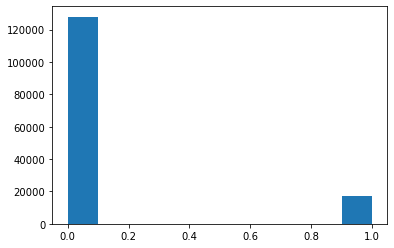

In [24]:

treatment_df = df2[(df2['group']=='treatment')]
n_new=treatment_df.shape[0]
new_page=treatment_df.converted
treatment_sample = np.random.choice(new_page,n_new,replace=True)
plt.hist(treatment_sample)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

(array([127667.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17607.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

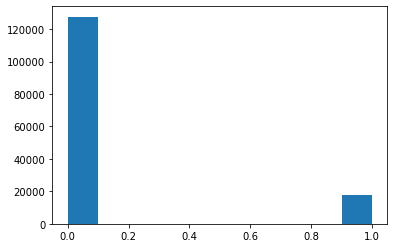

In [25]:

df_control = df2[df2['group']=='control']
n_old = df_control.shape[0]
old_page=df_control.converted
control_sample =np.random.choice(old_page,n_old,replace=True)
plt.hist(control_sample)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page.mean() - old_page.mean()

-0.0015782389853555567

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [54]:
p_diffs = []

for _ in range(10000):
    newsample = treatment_df.sample(n_new, replace=True)
    oldsample = df_control.sample(n_old, replace=True)

    old = oldsample['converted'].sum() / n_old
    new = newsample['converted'].sum() / n_new
    p_diffs.append(new - old)
    
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  14.,  119.,  502., 1496., 2585., 2671., 1750.,  677.,  162.,
          24.]),
 array([-5.99694740e-03, -5.13246958e-03, -4.26799176e-03, -3.40351394e-03,
        -2.53903612e-03, -1.67455830e-03, -8.10080475e-04,  5.43973466e-05,
         9.18875168e-04,  1.78335299e-03,  2.64783081e-03]),
 <BarContainer object of 10 artists>)

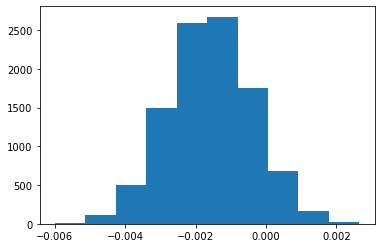

In [55]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [80]:

obs_diffs = t - c
(p_diffs > obs_diffs).mean()

0.907

In [61]:
p_diffs = p_diffs-p_diffs.mean()
obs_diffs = t - c

(array([  3.,   3.,   1.,   4.,   3.,   7.,  12.,  19.,  38.,  43.,  50.,
         95.,  99., 116., 142., 200., 255., 320., 344., 377., 419., 506.,
        558., 544., 558., 598., 534., 524., 497., 518., 452., 420., 308.,
        326., 244., 222., 148., 139., 101.,  67.,  60.,  37.,  26.,  20.,
         19.,  15.,   5.,   2.,   0.,   2.]),
 array([-4.41123823e-03, -4.23834266e-03, -4.06544710e-03, -3.89255154e-03,
        -3.71965597e-03, -3.54676041e-03, -3.37386484e-03, -3.20096928e-03,
        -3.02807371e-03, -2.85517815e-03, -2.68228259e-03, -2.50938702e-03,
        -2.33649146e-03, -2.16359589e-03, -1.99070033e-03, -1.81780477e-03,
        -1.64490920e-03, -1.47201364e-03, -1.29911807e-03, -1.12622251e-03,
        -9.53326944e-04, -7.80431380e-04, -6.07535816e-04, -4.34640252e-04,
        -2.61744687e-04, -8.88491231e-05,  8.40464412e-05,  2.56942005e-04,
         4.29837570e-04,  6.02733134e-04,  7.75628698e-04,  9.48524262e-04,
         1.12141983e-03,  1.29431539e-03,  1.46721

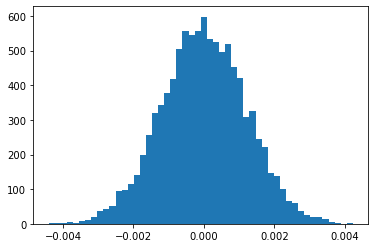

In [63]:
plt.hist(p_diffs,bins=50)

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This value is called a p-value in scientific studies (p-value = 0.0254 ).indicate that no significant difference and we can not reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = df2[df2['landing_page']=='old_page']['converted'].sum()
convert_new = df2[df2['landing_page']=='new_page']['converted'].sum()
n_old = df2[df2['landing_page']=='old_page']['converted'].count()
n_new = df2[df2['landing_page']=='new_page']['converted'].count()

In [45]:
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative='larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

the link have 404 Not Found


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

About the two-sample z-test
Recall that you have plotted a distribution p_diffs representing the difference in the "converted" probability  (𝑝′𝑛𝑒𝑤−𝑝′𝑜𝑙𝑑)  for your two simulated samples 10,000 times.

Another way for comparing the mean of two independent and normal distribution is a two-sample z-test. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

𝑍𝑠𝑐𝑜𝑟𝑒=(𝑝′𝑛𝑒𝑤−𝑝′𝑜𝑙𝑑)−(𝑝𝑛𝑒𝑤−𝑝𝑜𝑙𝑑)𝜎2𝑛𝑒𝑤𝑛𝑛𝑒𝑤+𝜎2𝑜𝑙𝑑𝑛𝑜𝑙𝑑⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√
 
where,

𝑝′  is the "converted" success rate in the sample
𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  are the "converted" success rate for the two groups in the population.
𝜎𝑛𝑒𝑤  and  𝜎𝑛𝑒𝑤  are the standard deviation for the two groups in the population.
𝑛𝑛𝑒𝑤  and  𝑛𝑜𝑙𝑑  represent the size of the two groups or samples (it's same in our case)
Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error.

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values:

𝑍𝑠𝑐𝑜𝑟𝑒 
𝑍𝛼  or  𝑍0.05 , also known as critical value at 95% confidence interval.  𝑍0.05  is 1.645 for one-tailed tests, and 1.960 for two-tailed test. You can determine the  𝑍𝛼  from the z-table manually.
Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the null based on the comparison between  𝑍𝑠𝑐𝑜𝑟𝑒  and  𝑍𝛼 . We determine whether or not the  𝑍𝑠𝑐𝑜𝑟𝑒  lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the  𝑍𝑠𝑐𝑜𝑟𝑒  lies in that region.

Hint:
For a right-tailed test, reject null if  𝑍𝑠𝑐𝑜𝑟𝑒  >  𝑍𝛼 .
For a left-tailed test, reject null if  𝑍𝑠𝑐𝑜𝑟𝑒  <  𝑍𝛼 .

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**logistic regression should be performed in this case .**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2[['ab_page','old_page']]=pd.get_dummies(df2['landing_page'])
df2=df2.drop('old_page',axis=1)
df2.head()

C:\Users\Mohamed Wael\AppData\Local\Temp\ipykernel_19180\571881304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['ab_page','old_page']]=pd.get_dummies(df2['landing_page'])
C:\Users\Mohamed Wael\AppData\Local\Temp\ipykernel_19180\571881304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['ab_page','old_page']]=pd.get_dummies(df2['landing_page'])


,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
df2['intercept']=1
log_model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-09-24 20:27 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**we can see that the outcomes are some what similar, here is the interpretation of why they differ, in the previous test we were doing a one tailed test to know if the new page is better. In the regression test the test is two tailed to check any impact of the new page whether it's positive or negative , we found out that the new page has a negative effect on conversion.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**while considering more factors can improve the model to some extent if they are relevant It cab be problematic as well , one common effect is overfitting meaning that its forced to match the points but not effective in making predictions , another problem is dependency between the variables.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [ ]:
### Create the necessary dummy variables

In [41]:
df_new[['CA','UK', 'US']]= pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [43]:
lm = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','US']])
result = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [44]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2022-09-24 20:37 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
US           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
### Fit Your Linear Model And Obtain the Results

In [46]:
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']

In [47]:
lm = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','US','US_ab_page','CA_ab_page']])
results2 = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [48]:
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-09-25 14:41 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
CA           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
US            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
US_ab_page   -0.0314    0.0266    -1.1807  0.2377  -0.0835   0.0207
CA_ab_page   -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
==================================================================

"""

#Conclusions


 I think the company should stick to the old one,becouse the different is not high,becouse the p is less than 0.05. In terms of performance the old page does slightly better

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1